# 🏠 Airbnb Price Prediction - EDA
This notebook performs initial exploratory data analysis on the Airbnb dataset.

In [ ]:
# Setup: Clone repo and set working directory (Google Colab users)
# This allows anyone opening this notebook in Colab to access all project files
!git clone https://github.com/babakbaradaran/ml_airbnb_price_regression.git
%cd ml_airbnb_price_regression

### Step 1: Import libraries

In [1]:
# We import Python libraries that help with:
#- Reading and working with data (`pandas`, `numpy`)
#- Plotting (`matplotlib`, `seaborn`)
#- Setting options to view more columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')

### Step 2: Dataset Validation and Setup

We begin by verifying the dataset path and loading it safely. This helps avoid runtime errors in environments like Google Colab or Codespaces.

In [2]:
import os

print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Babak.Baradaranhezav\ml-projects\ml_airbnb_price_regression\notebooks


In [3]:
from pathlib import Path
import os

# Set working directory only if not already set
cwd = Path.cwd()
if not (cwd / ".git").exists():
    for parent in cwd.parents:
        if (parent / ".git").exists():
            os.chdir(parent)
            print("Working directory set to repo root:", parent)
            break
    else:
        raise FileNotFoundError("Could not find .git repo root. Are you inside the correct project folder?")
else:
    print("Already in repo root:", cwd)


Working directory set to repo root: c:\Users\Babak.Baradaranhezav\ml-projects\ml_airbnb_price_regression


In [4]:
# Load Dataset with Validations

# Set the data path
data_path = 'data/raw/listings.csv'

# Check if file exists
assert os.path.exists(data_path), f"Data file not found at: {data_path}"

# Load the data
df = pd.read_csv(data_path)

# Confirm it loaded
print(f"Loaded successfully. Shape: {df.shape}")
df.sample(5)

Loaded successfully. Shape: (5090, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1679,51388855,https://www.airbnb.com/rooms/51388855,2.025060e+13,6/21/2025,city scrape,Random selected 1bedroom 1 den condo in Yaletown,***ATTENTION: THIS IS A RANDOM ASSIGNED APARTM...,NaN,https://a0.muscache.com/pictures/fcec136d-2145...,346562402,https://www.airbnb.com/users/show/346562402,Zodiac,5/17/2020,"Vancouver, Canada",Great Vacational Homes in British Columbia!,within an hour,90%,83%,f,https://a0.muscache.com/im/pictures/user/f062d...,https://a0.muscache.com/im/pictures/user/f062d...,Central Vancouver,6,153,"['email', 'phone']",t,t,NaN,Downtown,NaN,49.275900,-123.114320,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Carbon monoxide alarm"", ""TV"", ""Cleaning prod...",$150.00,90,999,90,90,1125,1125,90.0,1125.0,NaN,t,27,57,87,342,6/21/2025,26,3,0,191,6,255,38250.0,8/26/2021,11/16/2024,4.58,4.58,4.58,4.54,4.73,4.92,4.50,Municipal registration number: 21-158207,f,6,6,0,0,0.56
3056,968207932749862784,https://www.airbnb.com/rooms/968207932749862784,2.025060e+13,6/21/2025,previous scrape,Yaletown 2 bed unit,"Fully furnished 2 bed, 2 bath corner unit in t...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,95217850,https://www.airbnb.com/users/show/95217850,Mauricio,9/15/2016,"Vancouver, Canada",I'm a license property Manager & Realtor in Va...,within a few hours,100%,40%,t,https://a0.muscache.com/im/pictures/user/3a414...,https://a0.muscache.com/im/pictures/user/3a414...,Downtown Vancouver,27,35,"['email', 'phone']",t,t,NaN,Downtown,NaN,49.275707,-123.124807,Entire rental unit,Entire home/apt,4,NaN,2 baths,2.0,NaN,"[""TV"", ""Wifi"", ""Air conditioning"", ""Smoke alar...",NaN,90,365,90,90,365,365,90.0,365.0,NaN,t,0,0,13,102,6/21/2025,0,0,0,26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,27,27,0,0,NaN
238,7822189,https://www.airbnb.com/rooms/7822189,2.025060e+13,6/21/2025,city scrape,8 times Vancouver Super Host - Private roomB,I have availability from May. Minimum booking ...,"Central Location, easy access to HWY, train an...",https://a0.muscache.com/pictures/hosting/Hosti...,40743512,https://www.airbnb.com/users/show/40743512,Fatemeh,8/6/2015,"Vancouver, Canada",Welcome to our home! Happy that we got SuperHo...,within a few hours,100%,51%,f,https://a0.muscache.com/im/users/40743512/prof...,https://a0.muscache.com/im/users/40743512/prof...,Renfrew-Collingwood,11,11,"['email', 'phone']",t,t,Neighborhood highlights,Renfrew-Collingwood,NaN,49.252110,-123.032920,Private room in home,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Free washer \u2013 ...",$27.00,90,380,90,90,380,380,90.0,380.0,NaN,t,0

### Step 3: Load the dataset

In [5]:
df = pd.read_csv(data_path)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13188,https://www.airbnb.com/rooms/13188,2.025060e+13,6/25/2025,city scrape,Garden level studio in ideal loc.,Garden level studio suite with garden patio - ...,The uber hip Main street area is a short walk ...,https://a0.muscache.com/pictures/8408188/e1af6...,51466,https://www.airbnb.com/users/show/51466,Emma,11/4/2009,"Vancouver, Canada",I love to travel with my family in comfort and...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Riley Park,1,3,"['email', 'phone']",t,t,Neighborhood highlights,Riley Park,NaN,49.24773,-123.10509,Entire guest suite,Entire home/apt,4,1.0,1 bath,0.0,2.0,"[""Clothing storage: closet"", ""Wine glasses"", ""...",$136.00,2,180,1,2,180,180,2.0,180.0,NaN,t,3,7,14,192,6/25/2025,360,52,6,112,60,255,34680.0,2/21/2010,6/24/2025,4.85,4.88,4.86,4.87,4.94,4.90,4.81,Municipal registration number: 25-156058<br />...,f,1,1,0,0,1.93
1,16611,https://www.airbnb.com/rooms/16611,2.025060e+13,6/21/2025,previous scrape,"1 block to skytrain station, shops,restaurant,...","My place is close to bank, coffee shops, groce...",Next block to Commercial Drive which has many ...,https://a0.muscache.com/pictures/82101/7127b63...,58512,https://www.airbnb.com/users/show/58512,Q,11/29/2009,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/58512/profile...,https://a0.muscache.com/im/users/58512/profile...,Commercial Drive,6,7,"['email', 'phone']",t,t,Neighborhood highlights,Grandview-Woodland,NaN,49.26339,-123.07145,Entire home,Entire home/apt,6,NaN,1 bath,3.0,NaN,"[""Carbon monoxide alarm"", ""Host greets you"", ""...",NaN,365,365,365,365,365,365,365.0,365.0,NaN,t,30,60,90,90,6/21/2025,3,0,0,90,0,0,NaN,12/24/2017,2/16/2018,4.00,4.00,3.00,4.00,4.33,5.00,3.67,NaN,f,5,5,0,0,0.03
2,18270,https://www.airbnb.com/rooms/18270,2.025060e+13,6/21/2025,city scrape,private rm in clean central 2BR apt,I have a bright furnished 2 bedroom suite on a...,"Lots of restaurants, coffee shops.<br />Easy a...",https://a0.muscache.com/pictures/108520241/aec...,70437,https://www.airbnb.com/users/show/70437,Ran,1/14/2010,"Vancouver, Canada",In my spare time I am pretty active - currentl...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Mount Pleasant,1,4,"['email', 'phone']",t,t,Neighborhood highlights,Mount Pleasant,NaN,49.26557,-123.09600,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Park view"", ""Coffee maker"", ""Wifi"", ""Smoke a...",$46.00,90,1125,90,90,1125,1125,90.0,1125.0,NaN,t,22,43,64,2

### Step 4: Data overview

In [6]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape: (5090, 79)

Data Types:
 id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 79, dtype: object


### Step 5: Summary Table for All Columns

This table summarizes each feature in the dataset, showing its type, percentage of missing data, number of unique values, and a few sample entries.

In [7]:
summary = pd.DataFrame({
    "Data Type": df.dtypes,
    "% Missing": df.isnull().mean() * 100,
    "# Unique": df.nunique(),
    "Sample Values": df.apply(lambda x: x.dropna().unique()[:3])
}).sort_values("% Missing", ascending=False)

summary.style.background_gradient(cmap='Blues', subset=["% Missing"])



,Data Type,% Missing,# Unique,Sample Values
neighbourhood_group_cleansed,float64,100.000000,0,[]
calendar_updated,float64,100.000000,0,[]
host_about,object,49.332024,1700,"['I love to travel with my family in comfort and enjoy the ethos and community spirit of AirBNB. I also host on AirBNB so travelers can enjoy staying with us in Vancouver!\nBon Voyage !!' 'In my spare time I am pretty active - currently with beach volleyball, hiking, orienteering, swing dancing, and rock-climbing.\r\n\r\nI also enjoy travelling, reading, foreign films, and intelligent conversation about pretty much anything.\r\n\r\nI am often busy after work so may not see much of you, but would be happy to invite you along to some of the outdoor activities that I am doing if you are keen on hiking or other outdoor activities.' 'We - Alexis and Sylvain - are the Artistic Directors of Belle Spirale Dance Projects. We are passionate for our commitment to working in the arts and we want to reflect that in our home. Our intention is to create a welcoming and restful environment and we love to share it with our guests. Learn more about us at by searching for Belle Spirale Dance Projects.']"
neighborhood_overview,object,47.328094,2360,"['The uber hip Main street area is a short walk of 6 minutes to the east. Dozens of dining options. Great supermarkets, butcher ,cafe, pub, tiki lounge, ethnic restaurants of all sorts. Sprinkled with antique stores and retro clothing stores. To the West, just down the hill from the Canada Line station at King Edward is Cambie Village, theatre, flamenco dancing, fine dining, ice cream and more.' 'Next block to Commercial Drive which has many buses, shops, restaurants, doctors, coffee shops, banks' 'Lots of restaurants, coffee shops.Easy access to public transport in multiple directions.Close vicinity of community centre & public library.']"
neighbourhood,object,47.328094,1,['Neighborhood highlights']
host_location,object,22.278978,82,"['Vancouver, Canada' 'Richmond, Canada' 'Abbotsford, Canada']"
license,object,22.023576,3251,['Municipal registration number: 25-156058Provincial registration number: H403372913' 'Municipal registration number: 25-155972Provincial registration number: H810324706' 'Municipal registration number: 18-573700']
beds,float64,16.738703,14,[2. 1. 3.]
bathrooms,float64,16.738703,17,[1. 2. 1.5]
estimated_revenue_l365d,float64,16.738703,2065,[34680. 0. 47685.]


### Step 6: Clean Currency Columns

Convert dollar string fields like `price`, `cleaning_fee`, and `security_deposit` into numeric types for analysis.

In [8]:
currency_cols = ['price', 'security_deposit', 'cleaning_fee']
for col in currency_cols:
    if col in df.columns:
        df[col] = df[col].replace(r'[\$,]', '', regex=True).astype(float)

### Step 7: Check Missing Values

We identify the top features with missing values to prepare for cleaning or imputation.

In [9]:
df.isnull().sum().sort_values(ascending=False).head(15)

neighbourhood_group_cleansed    5090
calendar_updated                5090
host_about                      2511
neighborhood_overview           2409
neighbourhood                   2409
host_location                   1134
license                         1121
beds                             852
bathrooms                        852
estimated_revenue_l365d          852
price                            852
host_response_time               776
host_response_rate               776
last_review                      644
review_scores_cleanliness        644
dtype: int64

### Step 8: Price Distribution

This shows the raw price distribution, which is typically right-skewed.

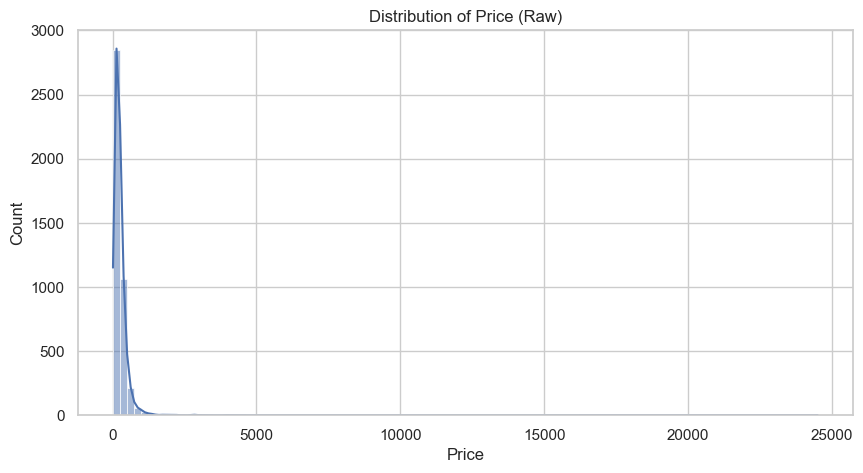

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Price (Raw)')
plt.xlabel('Price')
plt.show()

### Step 9: Log-Transformed Price

Since price is skewed, log transformation helps normalize it for modeling.

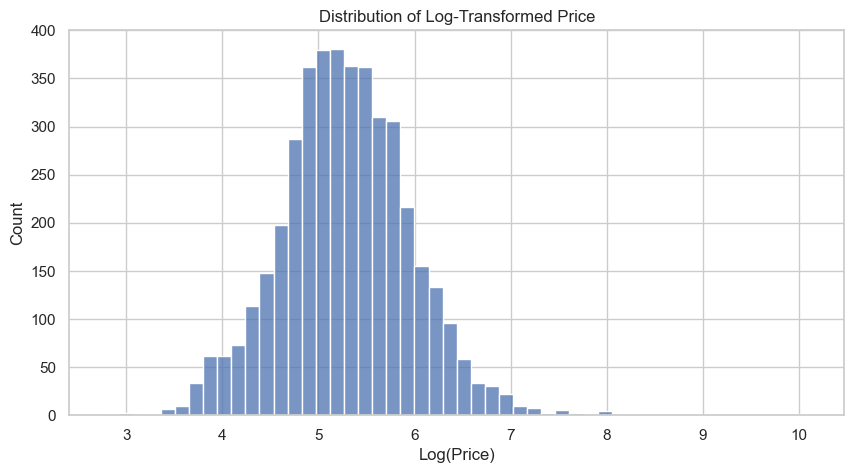

In [11]:
df['price_log'] = np.log1p(df['price'])

plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], bins=50)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()


### Step 10: Correlation Heatmap

This heatmap reveals relationships between numeric features, especially price.

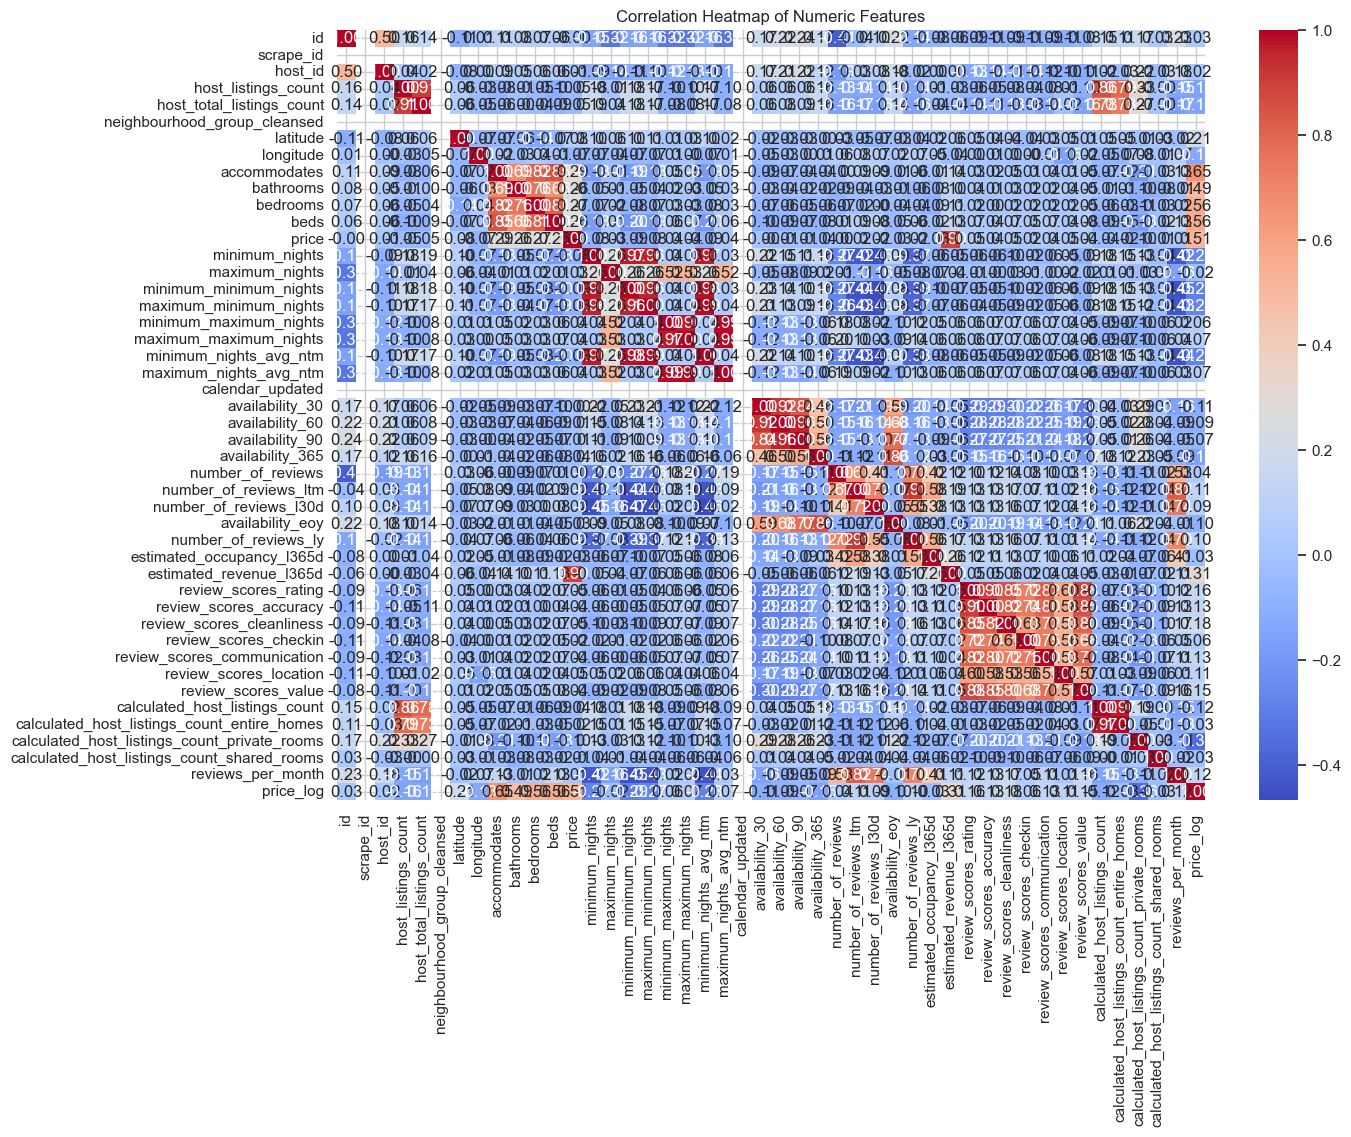

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Step 11: Categorical Feature Analysis

We explore key categorical variables and how they influence Airbnb listing prices. This includes bar plots, box plots, and count distributions for features like `room_type`, `neighbourhood`, and `property_type`.


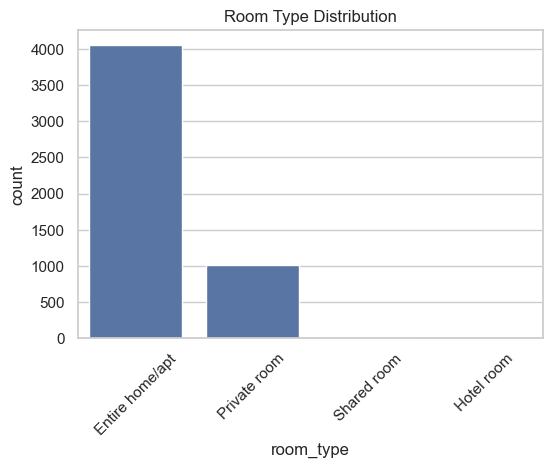

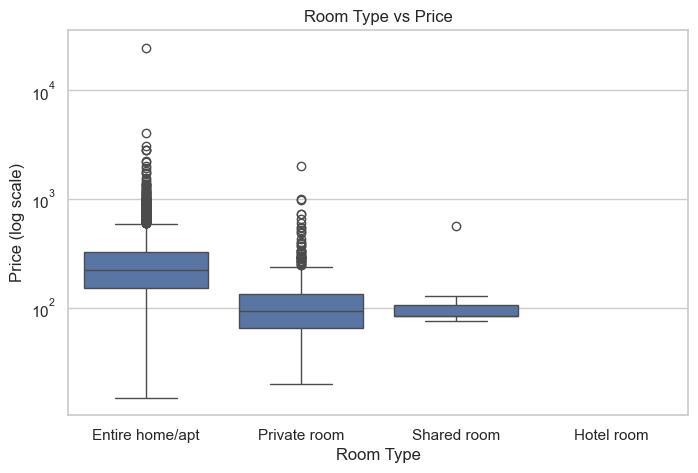

In [13]:
# Room type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Room type vs. price (log scale for better visual)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='price')
plt.yscale('log')
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price (log scale)')
plt.show()

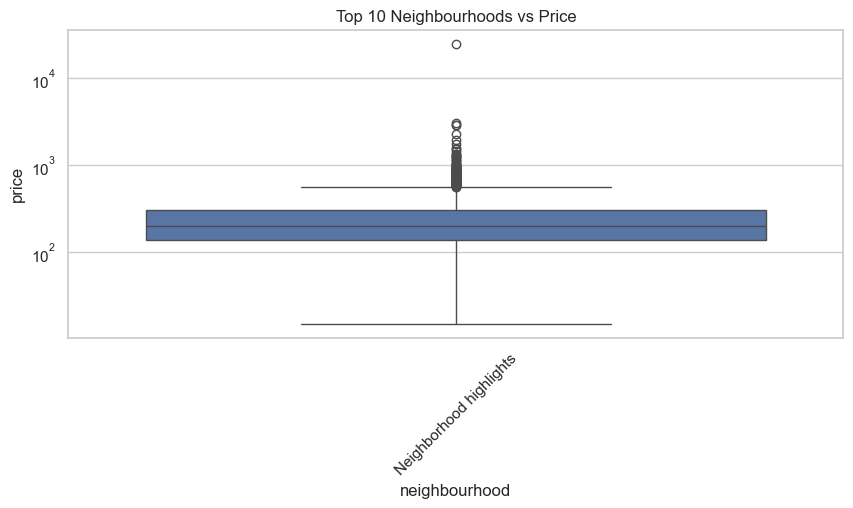

In [14]:
# Top 10 neighbourhoods by listing count
top_n = df['neighbourhood'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[df['neighbourhood'].isin(top_n)], x='neighbourhood', y='price')
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Top 10 Neighbourhoods vs Price')
plt.show()

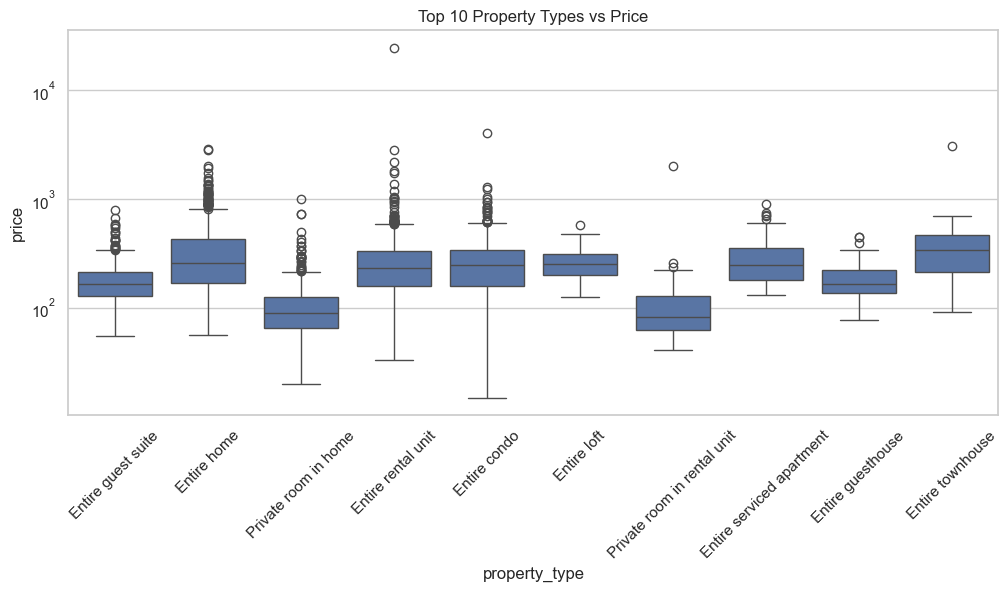

In [15]:
# Top 10 property types
# Check if 'property_type' exists before plotting
if 'property_type' in df.columns:
    top_p = df['property_type'].value_counts().nlargest(10).index
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df[df['property_type'].isin(top_p)], x='property_type', y='price')
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title('Top 10 Property Types vs Price')
    plt.show()
else:
    print("'property_type' column not found in dataset. Skipping this step.")

### Step 13: Save cleaned data for use in feature engineering

In [16]:
from pathlib import Path

# Define output path
cleaned_path = Path("data/processed/cleaned_listings.csv")

# Save the cleaned DataFrame
df.to_csv(cleaned_path, index=False)
print(f"Saved cleaned dataset to: {cleaned_path}")


Saved cleaned dataset to: data\processed\cleaned_listings.csv
